### Business Questions :

Q.1 What are the positive factors affecting loan repayments in order of priority?

Q.2 What are the negative factors affecting loan repayments in order of priority?

Q.3 Can we build a model to automatically classify as high risk or low risk using the outcome as target variable?

Q.4 Can we define our own scoring sytem to refine the model?


### Plan : 
#### 1. Exploratory Data Analysis
#### 2. Feature Engineering
#### 3. Feature Selection
#### 4. Model Building using ML
#### 5. Scoring Model + ML Model


#### Exploratory Data Analysis 
1. Load csv files into dataframe
2. View the descriptive statistics and datatypes of the columns in each dataframe.
3. Identify columns containing only null values; remove them from the dataframe.
4. Impute null values by replacing them with zero.
5. Merge applications dataframes with credit_file and outcomes dataframe using left join.
6. Use graphs to visualise the data distribution.

In [1]:
#### Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors
import re
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [2]:
applications = pd.read_csv("application.csv", sep=";")
applications.head()

,application_id,requested_amount,loan_purpose,monthly_repayment,apr_percentage,total_borrowing_cost,months_to_repay,date_create,date_create.1,date_create.2,...,permanent_address_ukregion,permanent_address_postcode_short,lived_abroad,date_of_birth,annual_income_user_input,future_income_change,income_change_reasons,income_change_other,rent,living_type_desc
0,14821,2791.0,DEBT CONSOLIDATION,100.0,0.188,3623.30,37.0,2021-06-21 10:32:10,2021-06-21 10:32:06,2021-06-21 10:37:23,...,England,LE1,0,1994-04-29 00:00:00,1500.0,0,NaN,NaN,NaN,NaN
1,14840,2791.0,DEBT CONSOLIDATION,100.0,0.188,3623.30,37.0,2021-06-21 10:56:31,2021-06-21 10:56:21,2021-06-21 11:05:14,...,Surrey,KT5,0,1986-05-14 00:00:00,2000.0,0,NaN,NaN,NaN,NaN
2,15095,500.0,HOME IMPROVEMENT,25.0,0.188,597.61,24.0,2021-06-22 13:47:36,2021-06-22 13:47:32,2021-06-22 13:52:31,...,Glasgow,G21,0,1999-10-22 00:00:00,1000.0,0,NaN,NaN,NaN,NaN
3,15438,1400.0,DEBT CONSOLIDATION,61.0,0.188,1720.91,29.0,2021-06-24 09:13:16,2021-06-24 09:13:15,2021-06-24 09:19:28,...,England,DN5,0,1994-10-26 00:00:00,1800.0,0,NaN,NaN,NaN,NaN
4,15882,5000.0,debt consolidation and car repairs,180.0,0.188,6390.30,36.0,2021-06-26 15:27:31,2021-06-26 15:27:28,2021-07-14 06:04:39,...,England,SS2,0,1993-01-05 00:00:00,27000.0,0,NaN,NaN,NaN,NaN


In [3]:
applications.describe()

,application_id,requested_amount,monthly_repayment,apr_percentage,total_borrowing_cost,months_to_repay,lived_abroad,annual_income_user_input,future_income_change,income_change_reasons,income_change_other,rent,living_type_desc
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,3.000000,0.0,824.000000,0.0
mean,103179.726000,4510.800424,201.58074,0.178709,5682.153490,30.294000,0.018000,33026.101000,0.003000,8.333333,NaN,546.237864,NaN
std,29851.119005,2529.487343,118.46571,0.025983,3488.053946,12.356142,0.133018,17572.631245,0.054717,6.429101,NaN,989.989350,NaN
min,14821.000000,500.000000,25.00000,0.100000,597.610000,3.000000,0.000000,500.000000,0.000000,1.000000,NaN,0.000000,NaN
25%,102980.250000,2500.000000,111.00000,0.152000,3016.515000,22.750000,0.000000,24000.000000,0.000000,6.000000,NaN,325.000000,NaN
50%,116622.500000,4000.000000,180.00000,0.188000,4609.485000,31.000000,0.000000,30000.000000,0.000000,11.000000,NaN,470.000000,NaN
75%,120516.250000,6000.000000,253.25000,0.198000,7720.100000,36.000000,0.000000,38000.000000,0.000000,12.000000,NaN,650.000000,NaN
max,125056.000000,10000.000000,1188.00000,0.220000,15678.390000,61.000000,1.000000,200000.000000,1.000000,13.000000,NaN,27500.000000,NaN


In [4]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   application_id                    1000 non-null   int64  
 1   requested_amount                  1000 non-null   float64
 2   loan_purpose                      1000 non-null   object 
 3   monthly_repayment                 1000 non-null   float64
 4   apr_percentage                    1000 non-null   float64
 5   total_borrowing_cost              1000 non-null   float64
 6   months_to_repay                   1000 non-null   float64
 7   date_create                       1000 non-null   object 
 8   date_create.1                     1000 non-null   object 
 9   date_create.2                     1000 non-null   object 
 10  permanent_address_city            1000 non-null   object 
 11  permanent_address_ukregion        1000 non-null   object 
 12  permane

In [5]:
applications = applications.fillna(0)

In [6]:
##### Removing columns : living_type_desc,income_change_other and income_change_reasons
applications=applications.drop(columns=["living_type_desc", "income_change_other", "income_change_reasons"])


In [7]:
outcome = pd.read_csv("outcome.csv", sep=";")
outcome.head()

,application_id,days_past_due
0,123709,14.0
1,123478,98.0
2,123295,48.0
3,123264,78.0
4,123123,14.0


In [8]:
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  1000 non-null   int64  
 1   days_past_due   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [9]:
outcome.describe()

,application_id,days_past_due
count,1000.000000,1000.000000
mean,103179.726000,35.559000
std,29851.119005,78.073568
min,14821.000000,0.000000
25%,102980.250000,0.000000
50%,116622.500000,0.000000
75%,120516.250000,32.000000
max,125056.000000,460.000000


In [10]:
applications = pd.merge(applications, outcome, on = "application_id", how = "left")
applications

,application_id,requested_amount,loan_purpose,monthly_repayment,apr_percentage,total_borrowing_cost,months_to_repay,date_create,date_create.1,date_create.2,permanent_address_city,permanent_address_ukregion,permanent_address_postcode_short,lived_abroad,date_of_birth,annual_income_user_input,future_income_change,rent,days_past_due
0,14821,2791.0,DEBT CONSOLIDATION,100.0,0.188,3623.30,37.0,2021-06-21 10:32:10,2021-06-21 10:32:06,2021-06-21 10:37:23,Loughborough,England,LE1,0,1994-04-29 00:00:00,1500.0,0,0.0,429.0
1,14840,2791.0,DEBT CONSOLIDATION,100.0,0.188,3623.30,37.0,2021-06-21 10:56:31,2021-06-21 10:56:21,2021-06-21 11:05:14,surbito,Surrey,KT5,0,1986-05-14 00:00:00,2000.0,0,0.0,160.0
2,15095,500.0,HOME IMPROVEMENT,25.0,0.188,597.61,24.0,2021-06-22 13:47:36,2021-06-22 13:47:32,2021-06-22 13:52:31,Glasgow,Glasgow,G21,0,1999-10-22 00:00:00,1000.0,0,0.0,130.0
3,15438,1400.0,DEBT CONSOLIDATION,61.0,0.188,1720.91,29.0,2021-06-24 09:13:16,2021-06-24 09:13:15,2021-06-24 09:19:28,Doncaster,England,DN5,0,1994-10-26 00:00:00,1800.0,0,0.0,178.0
4,15882,5000.0,debt consolidation and car repairs,180.0,0.188,6390.30,36.0,2021-06-26 15:27:31,2021-06-26 15:27:28,2021-07-14 06:04:39,Southend on Sea,England,SS2,0,1993-01-05 00:00:00,27000.0,0,0.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,124916,3000.0,DEBT CONSOLIDATION,165.0,0.194,3548.27,22.0,2022-07-31 17:06:48,2022-07-31 17:06:48,2022-07-31 17:06:48,Portsmouth,England,PO6,0,1988-11-15 00:00:00,30000.0,0,445.0,0.0
996,124919,5000.0,OTHER,197.0,0.208,6400.26,33.0,2022-07-31 17:22:45,2022-07-31 17:22:45,2022-07-31 17:22:45,Wigan,England,WN2,0,1994-06-26 00:00:00,35000.0,0,214.0,0.0
997,125034,10000.0,DEBT CONSOLIDATION,301.0,0.194,13940.26,47.0,2022-07-31 21:17:15,2022-07-31 21:17:15,2022-07-31 21:17:15,Nottingham,England,NG1,0,1994-12-29 00:00:00,23400.0,0,0.0,0.0
998,125046,6000.0,OTHER,206.0,0.152,7408.87,36.0,2022-07-31 21:48:42,2022-07-31 21:48:42,2022-07-31 21:48:42,Dagenham,England,RM8,0,1982-07-13 00:00:00,18000.0,0,157.0,0.0


In [11]:
credit_file = pd.read_csv("credit_file.csv", sep=";")
credit_file.head()

,application_id,created,cifas,credit_score,match_quality,hard_search_history,qcr,dob_mismatch,sp_active_ccj_count,sp_total_ccj_count,...,special_instruction_active,total_active_balance,unres_key_accounts,unresolved_default_balance,unsecured_balance,unsecured_monthly_payments,worst_current_all,worst_current_highcost,worst_historical_status,worst_recent_all
0,14821,2021-06-21 10:36:01.027,[],730,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,False,5177,False,0,5177,117.000000,0.0,NaN,0.0,0.0
1,14840,2021-06-24 09:14:32.074,[],820,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,False,3263,False,0,3263,104.666667,0.0,NaN,8.0,0.0
2,15095,2021-06-22 13:51:53.247,[],865,Low,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,False,91,False,0,91,0.000000,0.0,NaN,0.0,0.0
3,15438,2021-06-24 09:18:27.933,[],726,Low,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,False,888,False,0,888,49.500000,0.0,NaN,8.0,0.0
4,15882,2021-07-14 06:03:57.147,[],933,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,False,20350,False,0,15638,434.666667,0.0,NaN,1.0,0.0


In [12]:
credit_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   application_id                   1000 non-null   int64  
 1   created                          1000 non-null   object 
 2   cifas                            1000 non-null   object 
 3   credit_score                     1000 non-null   int64  
 4   match_quality                    999 non-null    object 
 5   hard_search_history              1000 non-null   object 
 6   qcr                              1000 non-null   bool   
 7   dob_mismatch                     1000 non-null   bool   
 8   sp_active_ccj_count              1000 non-null   int64  
 9   sp_total_ccj_count               1000 non-null   int64  
 10  sp_ever_iva_br                   50 non-null     object 
 11  card_limits                      1000 non-null   object 
 12  card_utilisation     

In [13]:
credit_file.describe()

,application_id,credit_score,sp_active_ccj_count,sp_total_ccj_count,card_utilisation,hp_balance,monthly_scheduled_payment,months_since_default,months_since_first_arrears,months_since_latest_2_down,...,overdraft_balance,revolving_balance,total_active_balance,unresolved_default_balance,unsecured_balance,unsecured_monthly_payments,worst_current_all,worst_current_highcost,worst_historical_status,worst_recent_all
count,1000.000000,1000.000000,1000.0,1000.000000,898.000000,1000.000000,1000.000000,186.000000,517.000000,347.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,0.0,999.000000,999.000000
mean,103169.815000,901.339000,0.0,0.029000,0.488309,5384.948000,357.432000,22.967742,59.613153,29.443804,...,215.793000,2681.195000,27590.961000,1.102000,5706.740000,543.085200,0.009009,NaN,2.194194,0.038038
std,29846.164059,125.504125,0.0,0.184914,0.306677,9869.813473,420.134777,16.132862,29.071371,21.344521,...,540.673754,3045.930031,67192.282416,14.333983,5188.509288,641.756676,0.130203,NaN,3.068086,0.238050
min,14821.000000,308.000000,0.0,0.000000,-0.008000,-100.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,-329.000000,0.000000,0.000000,0.000000,-2.666667,0.000000,NaN,0.000000,0.000000
25%,102980.250000,806.000000,0.0,0.000000,0.224308,0.000000,66.750000,10.000000,38.000000,14.000000,...,0.000000,649.750000,3247.250000,0.000000,2253.500000,179.375000,0.000000,NaN,0.000000,0.000000
50%,116618.500000,895.500000,0.0,0.000000,0.495727,0.000000,251.000000,22.000000,59.000000,25.000000,...,0.000000,1852.500000,7884.500000,0.000000,4609.000000,376.000000,0.000000,NaN,1.000000,0.000000
75%,120508.250000,995.000000,0.0,0.000000,0.746988,8002.250000,469.750000,32.000000,78.000000,41.000000,...,0.000000,3786.000000,17900.750000,0.000000,7648.500000,679.125000,0.000000,NaN,3.000000,0.000000
max,125056.000000,1251.000000,0.0,2.000000,1.037500,75955.000000,4344.000000,64.000000,139.000000,112.000000,...,4890.000000,43004.000000,842733.000000,368.000000,43756.000000,8015.166667,3.000000,NaN,8.000000,3.000000


In [14]:
#Removing the null column worst_current_highcost
credit_file = credit_file.drop(columns=["worst_current_highcost"])
credit_file

,application_id,created,cifas,credit_score,match_quality,hard_search_history,qcr,dob_mismatch,sp_active_ccj_count,sp_total_ccj_count,...,revolving_balance,special_instruction_active,total_active_balance,unres_key_accounts,unresolved_default_balance,unsecured_balance,unsecured_monthly_payments,worst_current_all,worst_historical_status,worst_recent_all
0,14821,2021-06-21 10:36:01.027,[],730,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,1255,False,5177,False,0,5177,117.000000,0.0,0.0,0.0
1,14840,2021-06-24 09:14:32.074,[],820,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,2479,False,3263,False,0,3263,104.666667,0.0,8.0,0.0
2,15095,2021-06-22 13:51:53.247,[],865,Low,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,91,False,91,False,0,91,0.000000,0.0,0.0,0.0
3,15438,2021-06-24 09:18:27.933,[],726,Low,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,888,False,888,False,0,888,49.500000,0.0,8.0,0.0
4,15882,2021-07-14 06:03:57.147,[],933,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,764,False,20350,False,0,15638,434.666667,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,124916,2022-07-31 17:02:01.437,[],778,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,0,False,0,False,0,0,0.000000,0.0,6.0,0.0
996,124919,2022-07-31 17:21:23.032,[],938,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,3106,False,86385,False,0,3106,317.833333,0.0,1.0,0.0
997,125034,2022-07-31 21:16:44.180,[],956,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,6625,False,6625,False,0,6625,247.666667,0.0,0.0,0.0
998,125046,2022-07-31 21:46:32.837,[],975,High,{<HardSearchTypeEnum.all_hard: 'all_hard'>: {<...,False,True,0,0,...,3625,False,3625,False,0,3625,1428.583333,0.0,0.0,0.0


In [15]:
credit_file = credit_file.fillna(0)

In [16]:
applications = pd.merge(applications, credit_file, on = "application_id", how = "left")
applications

,application_id,requested_amount,loan_purpose,monthly_repayment,apr_percentage,total_borrowing_cost,months_to_repay,date_create,date_create.1,date_create.2,...,revolving_balance,special_instruction_active,total_active_balance,unres_key_accounts,unresolved_default_balance,unsecured_balance,unsecured_monthly_payments,worst_current_all,worst_historical_status,worst_recent_all
0,14821,2791.0,DEBT CONSOLIDATION,100.0,0.188,3623.30,37.0,2021-06-21 10:32:10,2021-06-21 10:32:06,2021-06-21 10:37:23,...,1255.0,False,5177.0,False,0.0,5177.0,117.000000,0.0,0.0,0.0
1,14840,2791.0,DEBT CONSOLIDATION,100.0,0.188,3623.30,37.0,2021-06-21 10:56:31,2021-06-21 10:56:21,2021-06-21 11:05:14,...,2479.0,False,3263.0,False,0.0,3263.0,104.666667,0.0,8.0,0.0
2,15095,500.0,HOME IMPROVEMENT,25.0,0.188,597.61,24.0,2021-06-22 13:47:36,2021-06-22 13:47:32,2021-06-22 13:52:31,...,91.0,False,91.0,False,0.0,91.0,0.000000,0.0,0.0,0.0
3,15438,1400.0,DEBT CONSOLIDATION,61.0,0.188,1720.91,29.0,2021-06-24 09:13:16,2021-06-24 09:13:15,2021-06-24 09:19:28,...,888.0,False,888.0,False,0.0,888.0,49.500000,0.0,8.0,0.0
4,15882,5000.0,debt consolidation and car repairs,180.0,0.188,6390.30,36.0,2021-06-26 15:27:31,2021-06-26 15:27:28,2021-07-14 06:04:39,...,764.0,False,20350.0,False,0.0,15638.0,434.666667,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,124916,3000.0,DEBT CONSOLIDATION,165.0,0.194,3548.27,22.0,2022-07-31 17:06:48,2022-07-31 17:06:48,2022-07-31 17:06:48,...,0.0,False,0.0,False,0.0,0.0,0.000000,0.0,6.0,0.0
996,124919,5000.0,OTHER,197.0,0.208,6400.26,33.0,2022-07-31 17:22:45,2022-07-31 17:22:45,2022-07-31 17:22:45,...,3106.0,False,86385.0,False,0.0,3106.0,317.833333,0.0,1.0,0.0
997,125034,10000.0,DEBT CONSOLIDATION,301.0,0.194,13940.26,47.0,2022-07-31 21:17:15,2022-07-31 21:17:15,2022-07-31 21:17:15,...,6625.0,False,6625.0,False,0.0,6625.0,247.666667,0.0,0.0,0.0
998,125046,6000.0,OTHER,206.0,0.152,7408.87,36.0,2022-07-31 21:48:42,2022-07-31 21:48:42,2022-07-31 21:48:42,...,3625.0,False,3625.0,False,0.0,3625.0,1428.583333,0.0,0.0,0.0


In [17]:
transaction = pd.read_csv("transaction.csv", sep=";")
transaction.head()

,application_id,transaction_id,account_id,recurrence_event_id,recurrence_type,vendor_id,primary_category_id,sub_category_id,primary_category_description,sub_category_description,vendor_description,trans_post_date,trans_direction,trans_amount_gbp
0,103053,3485795120,f931f591-a68a-4c14-982d-19cb703adb86,652478786,SecondDayOfType,10894,13903,229,Shopping (Household Essentials),General Groceries,Central England Co-op,2022-06-10,Debit,23.40
1,103053,3485795121,f931f591-a68a-4c14-982d-19cb703adb86,652478808,FortNightly,0,8635,3883,Transfers / Other,Property Rental,None,2022-06-10,Credit,100.00
2,103053,3485795122,f931f591-a68a-4c14-982d-19cb703adb86,0,None,2261,30136,3859,Shopping (Discretionary),Over 18 Toys,LoveHoney,2022-06-09,Debit,196.91
3,103053,3485795123,f931f591-a68a-4c14-982d-19cb703adb86,0,None,8987,5725,272,Amazon All,Amazon,Marketplace,2022-06-09,Debit,18.65
4,103053,3485795124,f931f591-a68a-4c14-982d-19cb703adb86,0,None,0,5725,272,Amazon All,Amazon,None,2022-06-09,Debit,70.76


In [18]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339568 entries, 0 to 1339567
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   application_id                1339568 non-null  int64  
 1   transaction_id                1339568 non-null  int64  
 2   account_id                    1339568 non-null  object 
 3   recurrence_event_id           1339568 non-null  int64  
 4   recurrence_type               1339568 non-null  object 
 5   vendor_id                     1339568 non-null  int64  
 6   primary_category_id           1339568 non-null  int64  
 7   sub_category_id               1339568 non-null  int64  
 8   primary_category_description  1339568 non-null  object 
 9   sub_category_description      1339568 non-null  object 
 10  vendor_description            1339568 non-null  object 
 11  trans_post_date               1339568 non-null  object 
 12  trans_direction             

In [19]:
transaction= transaction.fillna(0)

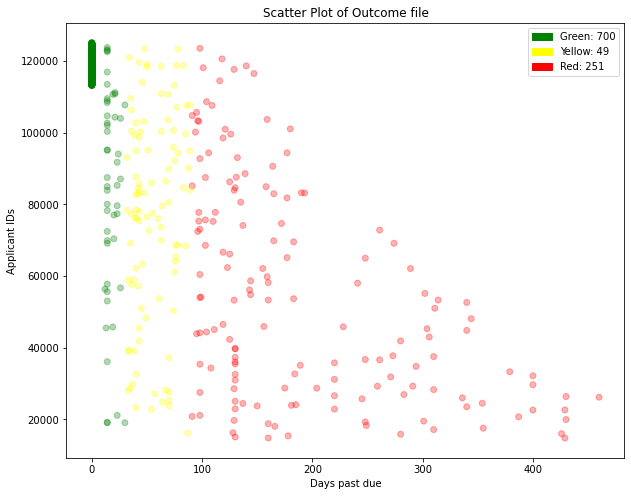

In [20]:
colors = ['green' if x <= 30 else 'yellow' if x <= 90 else 'red' for x in outcome['days_past_due']]
colors = [matplotlib.colors.to_rgba(c, alpha=0.3) if c == 'green' else matplotlib.colors.to_rgba(c, alpha=0.3) if c == 'yellow' else matplotlib.colors.to_rgba(c, alpha=0.3) for c in colors]
plt.figure(figsize=(10,8))
plt.scatter(outcome['days_past_due'], outcome['application_id'], c=colors)



# Create a list of patches with the color and label for each category
green_patch = mpatches.Patch(color='green', label='Green: '+str(sum([1 for x in outcome['days_past_due'] if x==0])))
yellow_patch = mpatches.Patch(color='yellow', label='Yellow: '+str(sum([1 for x in outcome['days_past_due'] if x>0 and x<=30 ])))
red_patch = mpatches.Patch(color='red', label='Red: '+str(sum([1 for x in outcome['days_past_due'] if x>30])))


# Add labels and title
plt.xlabel('Days past due')
plt.ylabel('Applicant IDs')
plt.title('Scatter Plot of Outcome file')
# Add the legend to the plot
plt.legend(handles=[green_patch, yellow_patch, red_patch])

# Show the plot
plt.show()


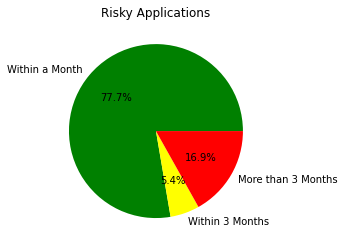

In [21]:
# risky applicantions share
total_applications = len(outcome['days_past_due'])
within_a_month = sum([1 for x in outcome['days_past_due'] if x==0])
within_3_months = sum([1 for x in outcome['days_past_due'] if x>0 and x<=30])
more_than_3_months = sum([1 for x in outcome['days_past_due'] if x>90])

# Create a list of the data for the pie chart
data = [within_a_month, within_3_months, more_than_3_months]

# Create a list of labels for the pie chart
labels = ['Within a Month', 'Within 3 Months', 'More than 3 Months']
colors = ['green','yellow','red']


# Create the pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Risky Applications')

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_score', ylabel='Density'>

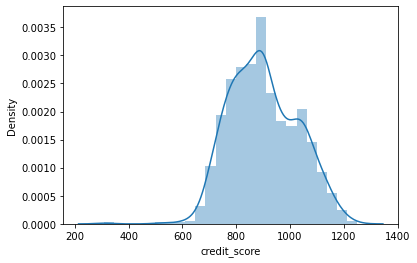

In [22]:
sns.distplot(credit_file["credit_score"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='card_utilisation', ylabel='Density'>

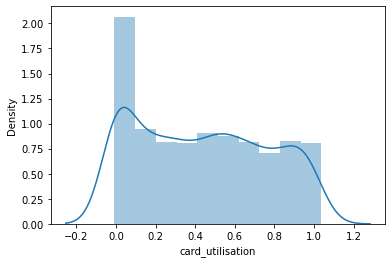

In [23]:
sns.distplot(credit_file["card_utilisation"])

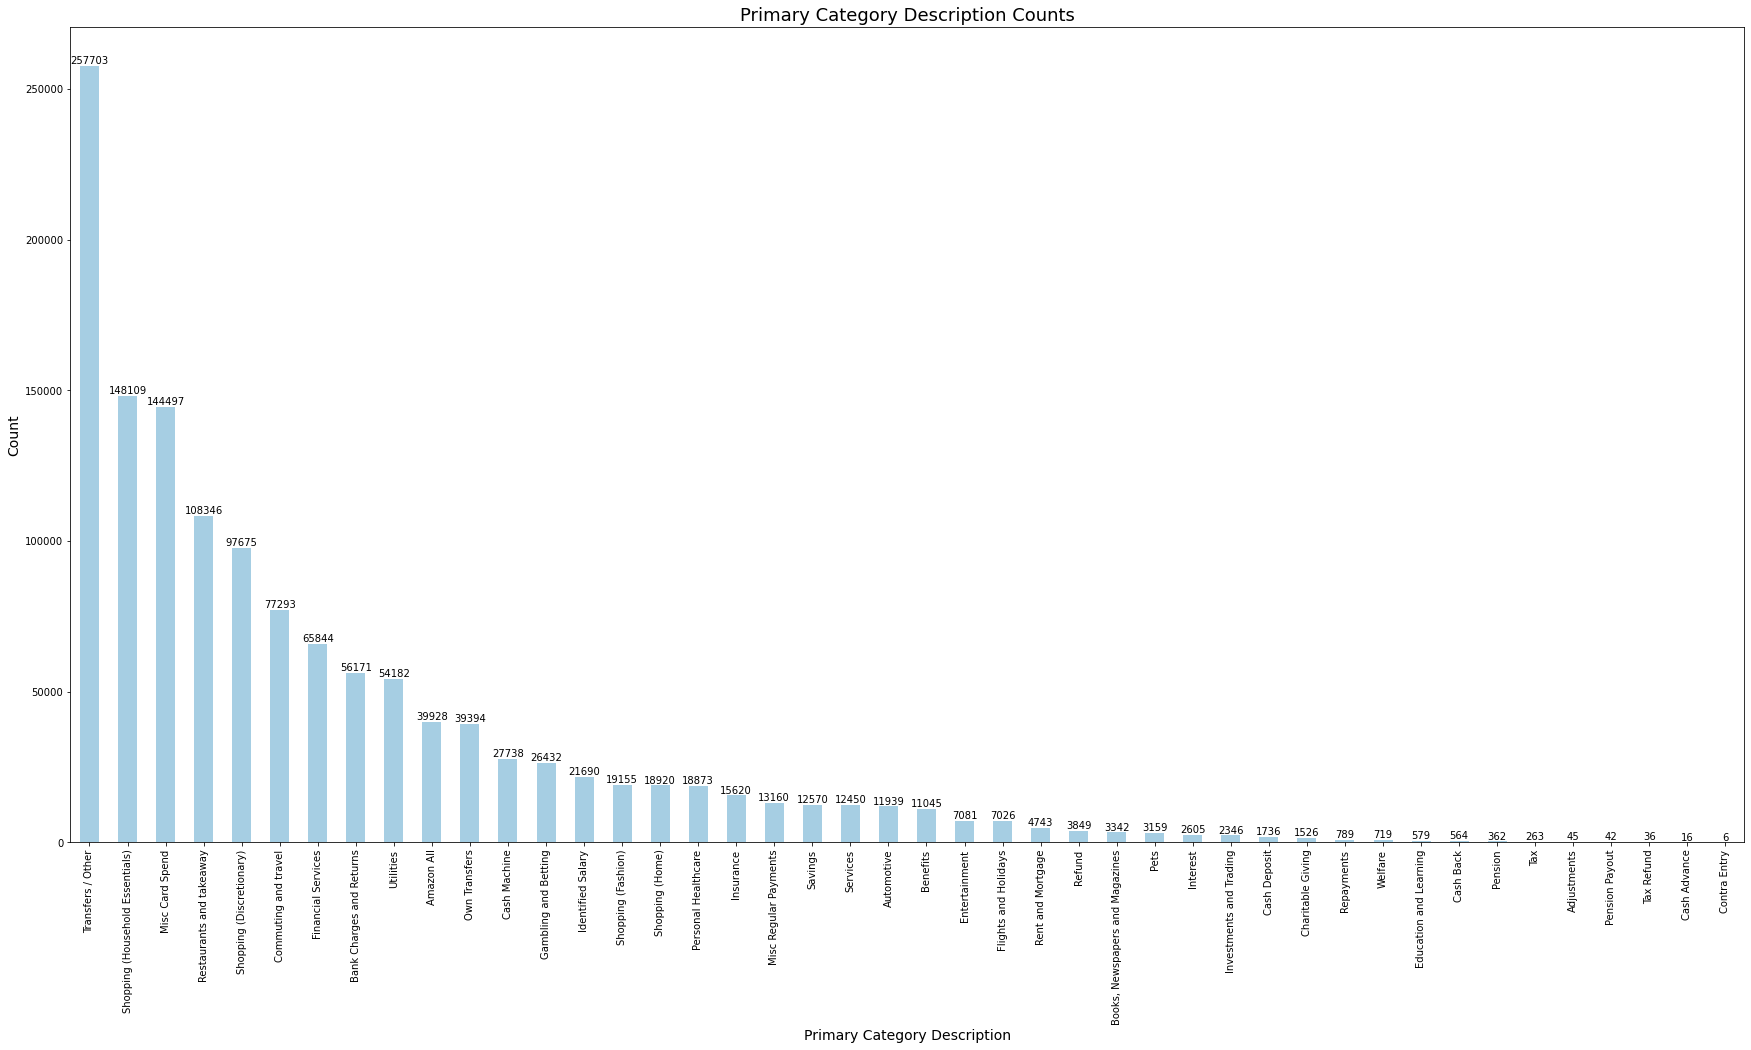

'The graph is plotted to have a quick overview of the different categories of transactions'

In [24]:
#Graph depicting category wise distribution of transactions for all the applications. 


# Get the value counts of the "primary_category_description" column
value_counts = transaction["primary_category_description"].value_counts()

# Create a bar plot of the value counts
value_counts.plot(kind='bar', colormap='Paired', figsize=(30,15))

# Add a title and labels to the plot
plt.title("Primary Category Description Counts", fontsize=18)
plt.xlabel("Primary Category Description", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add the value counts to the legend
for i in range(len(value_counts)):
    count = value_counts[i]
    category = value_counts.index[i]
    plt.text(x = i, y = count, s = count, ha = 'center', va='bottom')

# Show the plot
plt.show()

'''The graph is plotted to have a quick overview of the different categories of transactions'''


#### Feature Engineering 
1. Calculate Age of the applicants
2. Clean loan purpose column and create an ordinal mapping for different loan purpose categories
3. Creating a column trans_amount_signed where debit transactions are indicated with a negative sign and credit transactions are indicated with positive sign. 
4. Applying group by functions to create the following features : total_credit,total_debit,total_trans_amount_gbp,total_recurring_transactions,total_recurring_transactions_debit, total_recurring_transactions_credit, highest_debit_by_category and highest_credit_by_category.
5. Drop the original columns which are now converted to their ordinal mapping.
6. Merge applications dataframe with all the above created dataframes using left join.
7. Create hard_search_history_count, and income_without_rent

In [25]:
##### Calculating age of loan applicants at the time of account creation
applications["Age"] = (np.floor((pd.to_datetime(applications['date_create']) - 
             pd.to_datetime(applications['date_of_birth'])).dt.days / 365.25)).astype(int)

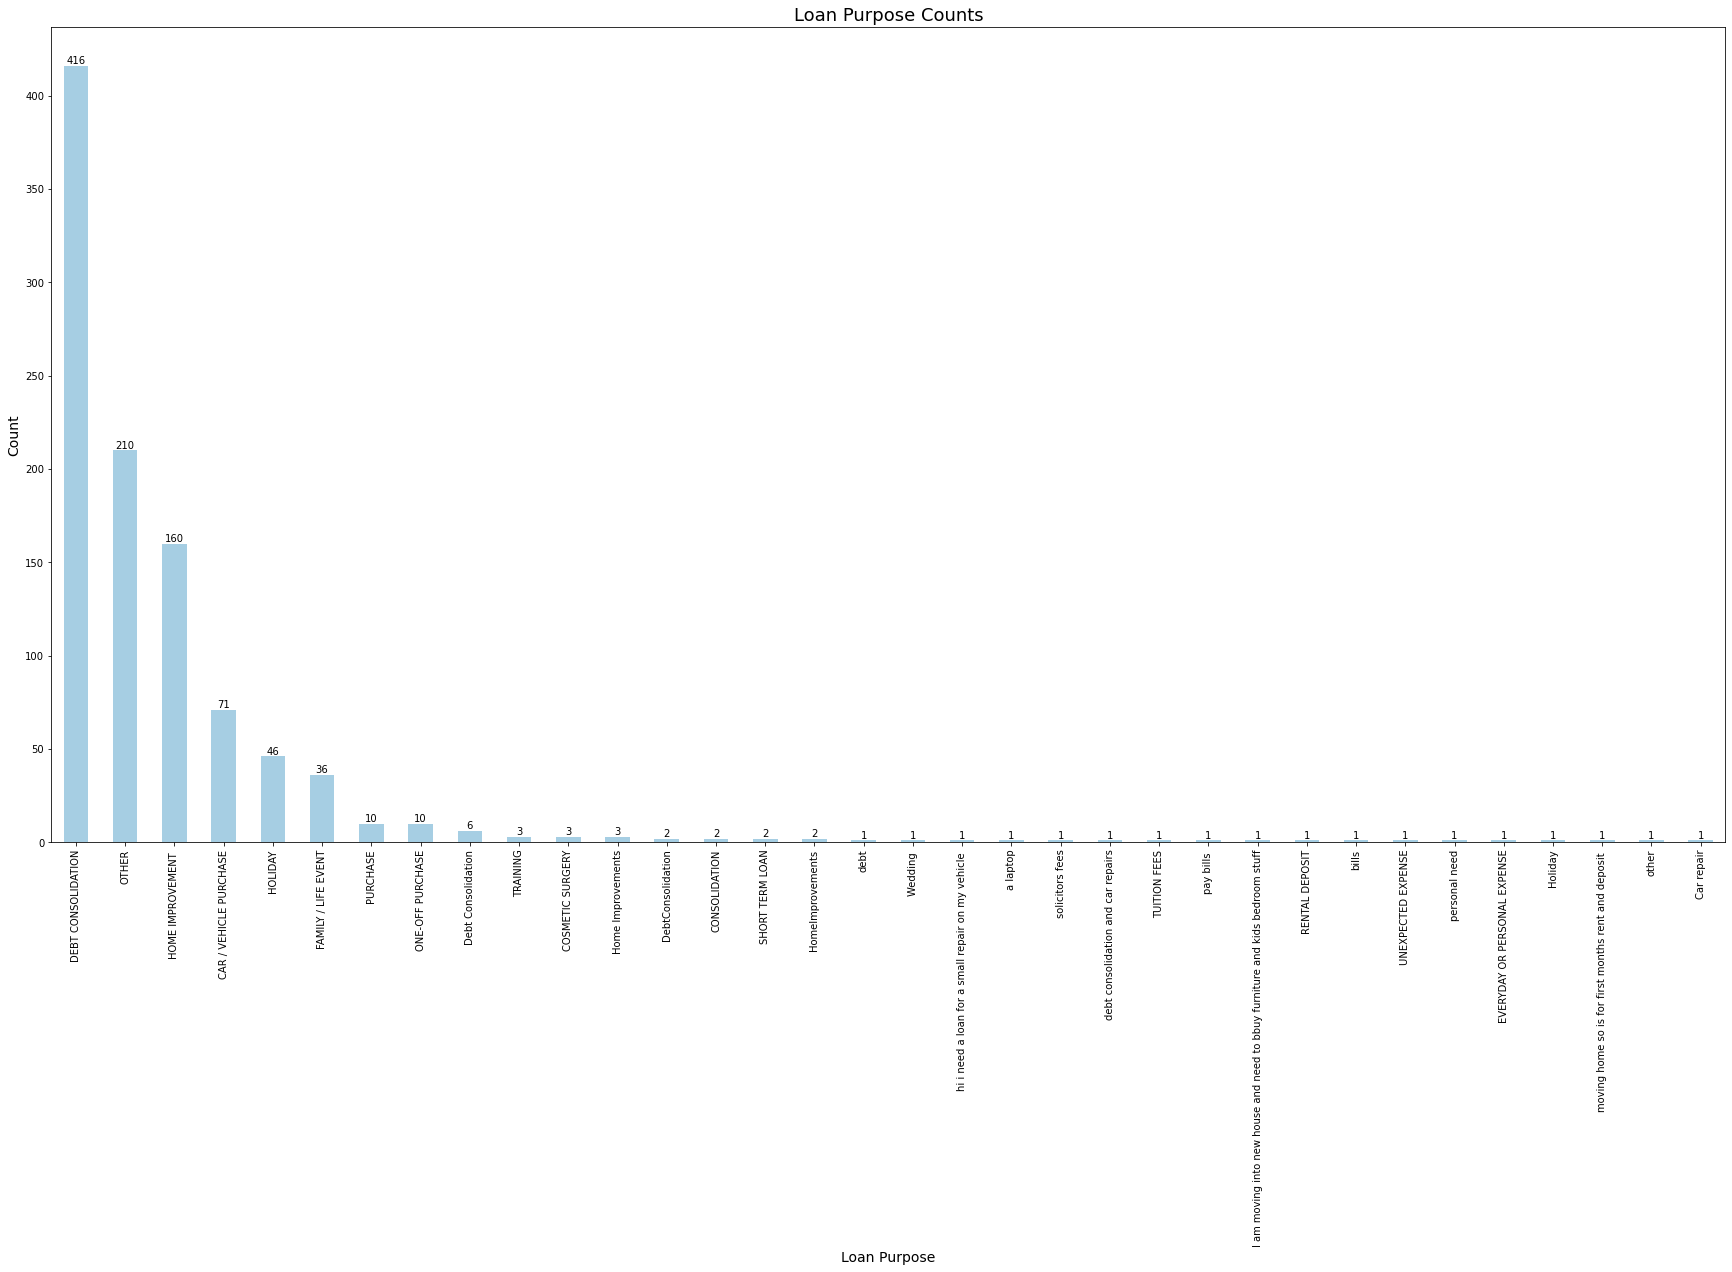

In [26]:
# Get the value counts of the "loan_purpose" column
value_counts = applications["loan_purpose"].value_counts()

# Create a bar plot of the value counts
value_counts.plot(kind='bar', colormap='Paired', figsize=(30,15))

# Add a title and labels to the plot
plt.title("Loan Purpose Counts", fontsize=18)
plt.xlabel("Loan Purpose", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add the value counts to the legend
for i in range(len(value_counts)):
    count = value_counts[i]
    category = value_counts.index[i]
    plt.text(x = i, y = count, s = count, ha = 'center', va='bottom')

# Show the plot
plt.show()

In [27]:
applications["loan_purpose"].unique()

array(['DEBT CONSOLIDATION', 'HOME IMPROVEMENT ',
       'debt consolidation and car repairs', 'pay bills ',
       'CAR / VEHICLE PURCHASE',
       'I am moving into new house and need to bbuy furniture and kids bedroom stuff',
       'HOLIDAY', 'bills', 'FAMILY / LIFE EVENT', 'personal need',
       'Debt Consolidation', 'Holiday', 'Home Improvements',
       'moving home so is for first months rent and deposit ', 'Wedding ',
       'DebtConsolidation', 'debt', 'HomeImprovements', 'other', 'OTHER',
       'ONE-OFF PURCHASE', 'EVERYDAY OR PERSONAL EXPENSE', 'PURCHASE',
       'UNEXPECTED EXPENSE', 'SHORT TERM LOAN', 'RENTAL DEPOSIT',
       'CONSOLIDATION', 'COSMETIC SURGERY', 'TUITION FEES', 'TRAINING',
       'solicitors fees', 'a laptop',
       'hi i need a loan for a small repair on my vehicle ', 'Car repair'],
      dtype=object)

In [28]:
# List of keywords to match loan purposes to
keywords = ['debt consolidation', 'home improvement', 'car', 'vehicle', 'purchase', 'holiday', 'family', 'life event', 'personal need', 'moving', 'wedding', 'other', 'one-off', 'everyday', 'unexpected', 'expense', 'short term', 'loan', 'rental', 'deposit', 'cosmetic', 'surgery', 'tuition', 'fees', 'training', 'solicitors', 'laptop', 'repair']

# Function to match loan purpose to keyword
def match_keyword(loan_purpose):
    loan_purpose = loan_purpose.lower()
    for keyword in keywords:
        if keyword in loan_purpose:
            return keyword
    return 'other'

applications["loan_purpose"] = applications["loan_purpose"].map(match_keyword)

# Print the updated loan_purpose column
applications["loan_purpose"].unique()


array(['debt consolidation', 'home improvement', 'other', 'car', 'moving',
       'holiday', 'family', 'personal need', 'wedding', 'purchase',
       'everyday', 'unexpected', 'short term', 'rental', 'cosmetic',
       'tuition', 'training', 'fees', 'laptop', 'vehicle'], dtype=object)

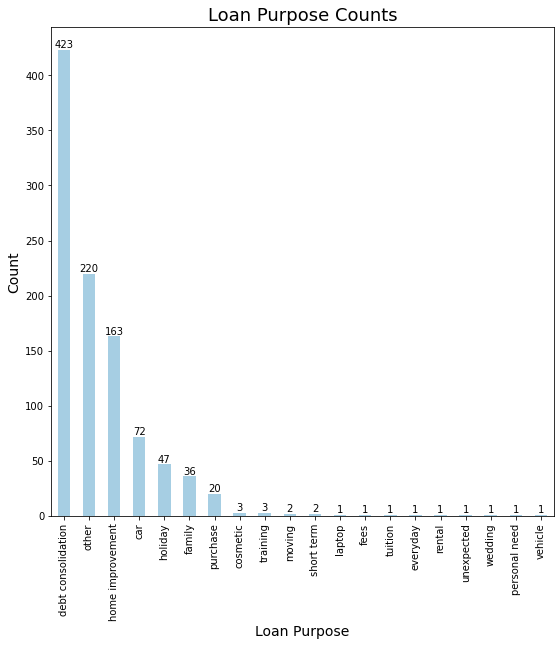

In [29]:
# Get the value counts of the "loan_purpose" column
value_counts = applications["loan_purpose"].value_counts()

# Create a bar plot of the value counts
value_counts.plot(kind='bar', colormap='Paired', figsize=(9,9))

# Add a title and labels to the plot
plt.title("Loan Purpose Counts", fontsize=18)
plt.xlabel("Loan Purpose", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add the value counts to the legend
for i in range(len(value_counts)):
    count = value_counts[i]
    category = value_counts.index[i]
    plt.text(x = i, y = count, s = count, ha = 'center', va='bottom')

# Show the plot
plt.show()

In [30]:
# create a dictionary to map loan purpose text to ordinal categories
loan_purpose_mapping = {'debt consolidation': 1, 'home improvement': 2, 'other': 3, 'car': 4, 'moving': 5,
       'holiday': 6, 'family': 7, 'personal need': 8, 'wedding': 9, 'purchase': 10,
       'everyday': 11, 'unexpected': 12, 'short term': 13, 'rental': 14, 'cosmetic': 15,
       'tuition': 16, 'training': 17, 'fees': 18, 'laptop': 19, 'vehicle': 20}

# create the column 'loan_purpose_category' and map the text values to ordinal categories
applications['loan_purpose_category'] = applications['loan_purpose'].map(loan_purpose_mapping)

#Removing loan purpose column
applications=applications.drop(columns=["loan_purpose"])

In [31]:
transaction['trans_amount_signed'] = transaction.apply(lambda row: -row['trans_amount_gbp'] if row['trans_direction'] == 'Debit' else row['trans_amount_gbp'], axis=1)
transaction

,application_id,transaction_id,account_id,recurrence_event_id,recurrence_type,vendor_id,primary_category_id,sub_category_id,primary_category_description,sub_category_description,vendor_description,trans_post_date,trans_direction,trans_amount_gbp,trans_amount_signed
0,103053,3485795120,f931f591-a68a-4c14-982d-19cb703adb86,652478786,SecondDayOfType,10894,13903,229,Shopping (Household Essentials),General Groceries,Central England Co-op,2022-06-10,Debit,23.40,-23.40
1,103053,3485795121,f931f591-a68a-4c14-982d-19cb703adb86,652478808,FortNightly,0,8635,3883,Transfers / Other,Property Rental,None,2022-06-10,Credit,100.00,100.00
2,103053,3485795122,f931f591-a68a-4c14-982d-19cb703adb86,0,None,2261,30136,3859,Shopping (Discretionary),Over 18 Toys,LoveHoney,2022-06-09,Debit,196.91,-196.91
3,103053,3485795123,f931f591-a68a-4c14-982d-19cb703adb86,0,None,8987,5725,272,Amazon All,Amazon,Marketplace,2022-06-09,Debit,18.65,-18.65
4,103053,3485795124,f931f591-a68a-4c14-982d-19cb703adb86,0,None,0,5725,272,Amazon All,Amazon,None,2022-06-09,Debit,70.76,-70.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339563,113804,3671086275,43c9703d-25b7-4ba3-8afa-25d003ba40f2,0,None,11735,6390,3776,Financial Services,Banks And Building Societies,Starling Bank,2021-07-09,Credit,15.00,15.00
1339564,113804,3671086276,43c9703d-25b7-4ba3-8afa-25d003ba40f2,0,None,334,13903,229,Shopping (Household Essentials),General Groceries,FarmFoods,2021-07-09,Debit,8.00,-8.00
1339565,113804,3671086278,43c9703d-25b7-4ba3-8afa-25d003ba40f2,0,None,0,8635,0,Transfers / Other,None,None,2021-07-09,Debit,4.50,-4.50
1339566,113804,3671086279,43c9703d-25b7-4ba3-8afa-25d003ba40f2,0,None,504,12633,5542,Commuting and travel,Taxis,Uber,2021-07-08,Debit,9.17,-9.17


In [32]:

total_credit = transaction[transaction.trans_direction == "Credit"].groupby(["application_id","trans_direction"])["trans_amount_signed"].sum().reset_index().rename(columns={'application_id':'application_id','trans_direction':'total_credit'})
total_credit

,application_id,total_credit,trans_amount_signed
0,14821,Credit,35281.13
1,14840,Credit,34690.15
2,15095,Credit,15443.33
3,15438,Credit,13898.98
4,15882,Credit,53448.48
...,...,...,...
995,124916,Credit,50094.03
996,124919,Credit,66128.44
997,125034,Credit,25818.95
998,125046,Credit,36222.83


In [33]:

total_debit = transaction[transaction.trans_direction == "Debit"].groupby(["application_id","trans_direction"])["trans_amount_signed"].sum().reset_index().rename(columns={'application_id':'application_id','trans_direction':'total_debit'})
total_debit

,application_id,total_debit,trans_amount_signed
0,14821,Debit,-35834.97
1,14840,Debit,-37469.97
2,15095,Debit,-15440.26
3,15438,Debit,-14507.18
4,15882,Debit,-54823.21
...,...,...,...
995,124916,Debit,-49758.05
996,124919,Debit,-65906.92
997,125034,Debit,-25830.46
998,125046,Debit,-36269.08


In [34]:
#To check if overall the total credit is more or debit in an entire year
total_trans_amount_gbp = transaction.groupby(['application_id'])['trans_amount_signed'].sum().reset_index().rename(columns={'application_id':'application_id','trans_amount_signed':'total_trans_amount_gbp'})
total_trans_amount_gbp

,application_id,total_trans_amount_gbp
0,14821,-553.84
1,14840,-2779.82
2,15095,3.07
3,15438,-608.20
4,15882,-1374.73
...,...,...
995,124916,335.98
996,124919,221.52
997,125034,-11.51
998,125046,-46.25


In [35]:
total_recurring_transactions = transaction[transaction['recurrence_event_id'] != 0].groupby('application_id')['trans_amount_signed'].sum().reset_index().rename(columns={'application_id':'application_id','trans_amount_signed':'total_recurring_transactions'})

total_recurring_transactions_debit = transaction[(transaction.trans_direction == "Debit") & (transaction['recurrence_event_id'] != 0)].groupby('application_id')['trans_amount_signed'].sum().reset_index().rename(columns={'application_id':'application_id','trans_amount_signed':'total_recurring_transactions_debit'})
total_recurring_transactions_credit = transaction[(transaction.trans_direction == "Credit") & (transaction['recurrence_event_id'] != 0)].groupby('application_id')['trans_amount_signed'].sum().reset_index().rename(columns={'application_id':'application_id','trans_amount_signed':'total_recurring_transactions_credit'})


In [36]:
total_debit_transactions_by_category = transaction[transaction.trans_direction == "Debit"].groupby(["application_id","primary_category_description"])["trans_amount_signed"].sum().reset_index().rename(columns={'application_id':'application_id','trans_amount_signed':'total_debit_trans_per_category'})
highest_debit_by_category=total_debit_transactions_by_category.loc[total_debit_transactions_by_category.groupby("application_id")["total_debit_trans_per_category"].idxmax()]

total_credit_transactions_by_category = transaction[transaction.trans_direction == "Credit"].groupby(["application_id","primary_category_description"])["trans_amount_signed"].sum().reset_index().rename(columns={'application_id':'application_id','trans_amount_signed':'total_credit_trans_per_category'})
highest_credit_by_category=total_credit_transactions_by_category.loc[total_credit_transactions_by_category.groupby("application_id")["total_credit_trans_per_category"].idxmax()]


In [37]:
# Create a dictionary that maps the categories to their ordinal values
debit_categories = list(highest_debit_by_category['primary_category_description'].unique())
debit_mapping = {debit_cat: i for i, debit_cat in enumerate(debit_categories)}

credit_categories = list(highest_credit_by_category['primary_category_description'].unique())
credit_mapping = {credit_cat: i for i, credit_cat in enumerate(credit_categories)}


# Create the new column in the dataframe using the map function
highest_debit_by_category['highest_debit_category_ordinal'] = highest_debit_by_category['primary_category_description'].map(debit_mapping)
highest_debit_by_category=highest_debit_by_category.drop(columns=["total_debit_trans_per_category"])


highest_credit_by_category['highest_credit_category_ordinal'] = highest_credit_by_category['primary_category_description'].map(credit_mapping)
highest_credit_by_category=highest_credit_by_category.drop(columns=["total_credit_trans_per_category"])


In [38]:
debit_mapping

{'Books, Newspapers and Magazines': 0,
 'Flights and Holidays': 1,
 'Automotive': 2,
 'Gambling and Betting': 3,
 'Bank Charges and Returns': 4,
 'Charitable Giving': 5,
 'Investments and Trading': 6,
 'Entertainment': 7,
 'Interest': 8,
 'Shopping (Home)': 9,
 'Personal Healthcare': 10,
 'Cash Machine': 11,
 'Services': 12,
 'Financial Services': 13,
 'Amazon All': 14,
 'Shopping (Household Essentials)': 15,
 'Own Transfers': 16,
 'Insurance': 17,
 'Shopping (Fashion)': 18,
 'Savings': 19,
 'Misc Card Spend': 20,
 'Pets': 21,
 'Tax': 22,
 'Misc Regular Payments': 23,
 'Education and Learning': 24,
 'Restaurants and takeaway': 25,
 'Commuting and travel': 26,
 'Contra Entry': 27,
 'Transfers / Other': 28,
 'Welfare': 29,
 'Rent and Mortgage': 30,
 'Utilities': 31,
 'Shopping (Discretionary)': 32}

In [39]:
credit_mapping

{'Benefits': 0,
 'Identified Salary': 1,
 'Transfers / Other': 2,
 'Insurance': 3,
 'Own Transfers': 4,
 'Financial Services': 5,
 'Gambling and Betting': 6,
 'Cash Deposit': 7}

In [40]:
highest_credit_by_category=highest_credit_by_category.drop(columns=["primary_category_description"])
highest_debit_by_category=highest_debit_by_category.drop(columns=["primary_category_description"])


In [41]:
#Merging all the necessary grouped by data from the transaction file

applications = pd.merge(applications, total_recurring_transactions, on = "application_id", how = "left")
applications = pd.merge(applications, total_recurring_transactions_debit, on = "application_id", how = "left")
applications = pd.merge(applications, total_recurring_transactions_credit, on = "application_id", how = "left")
applications = pd.merge(applications, total_trans_amount_gbp, on = "application_id", how = "left")
applications = pd.merge(applications, highest_debit_by_category, on = "application_id", how = "left")
applications = pd.merge(applications, highest_credit_by_category, on = "application_id", how = "left")


In [42]:
applications=applications.fillna(0)

##### First we convert the hard search column to check if the number of searches are more than 6 in one year 

In [43]:
applications["hard_search_history_str"]=applications["hard_search_history"].apply(lambda x : str(x))

In [44]:
applications["hard_search_history_count"]=applications["hard_search_history_str"].apply(lambda x : re.findall(r'\b\d+\b',x))

In [45]:
applications["hard_search_history_count"] = applications["hard_search_history_count"].apply(lambda x: sum(int(i) for i in x))


In [46]:
applications["hard_search_history_count"]

0      6
1      4
2      4
3      4
4      5
      ..
995    6
996    6
997    4
998    9
999    4
Name: hard_search_history_count, Length: 1000, dtype: int64

In [47]:
applications=applications.drop(columns = ['hard_search_history_str','hard_search_history'])
applications

,application_id,requested_amount,monthly_repayment,apr_percentage,total_borrowing_cost,months_to_repay,date_create,date_create.1,date_create.2,permanent_address_city,...,worst_recent_all,Age,loan_purpose_category,total_recurring_transactions,total_recurring_transactions_debit,total_recurring_transactions_credit,total_trans_amount_gbp,highest_debit_category_ordinal,highest_credit_category_ordinal,hard_search_history_count
0,14821,2791.0,100.0,0.188,3623.30,37.0,2021-06-21 10:32:10,2021-06-21 10:32:06,2021-06-21 10:37:23,Loughborough,...,0.0,27,1,-430.74,-12367.34,11936.60,-553.84,0,0,6
1,14840,2791.0,100.0,0.188,3623.30,37.0,2021-06-21 10:56:31,2021-06-21 10:56:21,2021-06-21 11:05:14,surbito,...,0.0,35,1,11159.34,-7115.66,18275.00,-2779.82,1,1,4
2,15095,500.0,25.0,0.188,597.61,24.0,2021-06-22 13:47:36,2021-06-22 13:47:32,2021-06-22 13:52:31,Glasgow,...,0.0,21,2,10525.10,-3130.69,13655.79,3.07,0,1,4
3,15438,1400.0,61.0,0.188,1720.91,29.0,2021-06-24 09:13:16,2021-06-24 09:13:15,2021-06-24 09:19:28,Doncaster,...,0.0,26,1,4215.85,-3886.81,8102.66,-608.20,2,1,4
4,15882,5000.0,180.0,0.188,6390.30,36.0,2021-06-26 15:27:31,2021-06-26 15:27:28,2021-07-14 06:04:39,Southend on Sea,...,0.0,28,1,20448.09,-15429.16,35877.25,-1374.73,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,124916,3000.0,165.0,0.194,3548.27,22.0,2022-07-31 17:06:48,2022-07-31 17:06:48,2022-07-31 17:06:48,Portsmouth,...,0.0,33,1,12878.61,-8636.74,21515.35,335.98,21,2,6
996,124919,5000.0,197.0,0.208,6400.26,33.0,2022-07-31 17:22:45,2022-07-31 17:22:45,2022-07-31 17:22:45,Wigan,...,0.0,28,3,28142.43,-16013.12,44155.55,221.52,4,1,6
997,125034,10000.0,301.0,0.194,13940.26,47.0,2022-07-31 21:17:15,2022-07-31 21:17:15,2022-07-31 21:17:15,Nottingham,...,0.0,27,1,8063.82,-5186.51,13250.33,-11.51,2,1,4
998,125046,6000.0,206.0,0.152,7408.87,36.0,2022-07-31 21:48:42,2022-07-31 21:48:42,2022-07-31 21:48:42,Dagenham,...,0.0,40,3,8963.37,-10083.60,19046.97,-46.25,2,2,9


In [48]:
applications["income_without_rent"] = applications["annual_income_user_input"] - applications["rent"]
applications["income_without_rent"]
#Residual income

0       1500.0
1       2000.0
2       1000.0
3       1800.0
4      27000.0
        ...   
995    29555.0
996    34786.0
997    23400.0
998    17843.0
999    31423.0
Name: income_without_rent, Length: 1000, dtype: float64

In [49]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       1000 non-null   int64  
 1   requested_amount                     1000 non-null   float64
 2   monthly_repayment                    1000 non-null   float64
 3   apr_percentage                       1000 non-null   float64
 4   total_borrowing_cost                 1000 non-null   float64
 5   months_to_repay                      1000 non-null   float64
 6   date_create                          1000 non-null   object 
 7   date_create.1                        1000 non-null   object 
 8   date_create.2                        1000 non-null   object 
 9   permanent_address_city               1000 non-null   object 
 10  permanent_address_ukregion           1000 non-null   object 
 11  permanent_address_postcode_shor

#### Feature Selection 
1. Filter numerical columns.
2. Chcek if no null values.
3. Drop columns not needed fpr analysis 
4. Reduce number of features using mutual information (a feature selection filter method).
5. Use regularization techniques on reduced number of features.
6. Use Pearson's correlation to get positive and negative factors on the list of features given as an outcome by the regularization (Lasso regression) technique.
7. Applying a threshold to further filter the features.

In [50]:
#As most of the categorical data has been feature engineered into ordinal data we can filter out numerical columns.

# Create a subset of the DataFrame with numerical columns only
numerical_columns = applications[ [col for col in applications if applications[col].dtype in ['float64', 'int64']]]


In [51]:
numerical_columns=numerical_columns.fillna(0)
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       1000 non-null   int64  
 1   requested_amount                     1000 non-null   float64
 2   monthly_repayment                    1000 non-null   float64
 3   apr_percentage                       1000 non-null   float64
 4   total_borrowing_cost                 1000 non-null   float64
 5   months_to_repay                      1000 non-null   float64
 6   lived_abroad                         1000 non-null   int64  
 7   annual_income_user_input             1000 non-null   float64
 8   future_income_change                 1000 non-null   int64  
 9   rent                                 1000 non-null   float64
 10  days_past_due                        1000 non-null   float64
 11  credit_score                   

In [52]:
#Dropping columns that are not needed for analysis
numerical_columns=numerical_columns.drop(columns=['apr_percentage','total_borrowing_cost','months_to_repay','monthly_repayment'])

In [53]:
#Method 1 : Mutual Information

# Assume X is your feature matrix and y is your target variable
X = numerical_columns.drop(columns=['days_past_due']) # your feature matrix# your feature matrix
y = numerical_columns['days_past_due']

# Perform feature selection with mutual information
selector = SelectKBest(mutual_info_classif, k=30)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)
print(selected_features)



[ 0  1  3  4 11 13 14 15 16 17 18 19 21 22 24 25 27 28 29 31 32 34 35 36
 38 39 44 45 46 47]


In [54]:
# Get the names of the selected features
feature_names = X.columns[selected_features]
print(feature_names)


Index(['application_id', 'requested_amount', 'annual_income_user_input',
       'future_income_change', 'monthly_scheduled_payment',
       'months_since_first_arrears', 'months_since_latest_2_down',
       'months_since_latest_arrears', 'mortgage_monthly_repayments',
       'non_mortgage_monthly_repayments', 'num_active_cais',
       'num_active_cards', 'num_active_hp', 'num_active_loans',
       'num_default_cais', 'num_defaults_ever', 'num_settled_cais',
       'num_settled_defaults', 'overdraft_balance', 'total_active_balance',
       'unresolved_default_balance', 'unsecured_monthly_payments',
       'worst_current_all', 'worst_historical_status', 'Age',
       'loan_purpose_category', 'highest_debit_category_ordinal',
       'highest_credit_category_ordinal', 'hard_search_history_count',
       'income_without_rent'],
      dtype='object')


In [55]:
#Method 2 
from sklearn.linear_model import Lasso


# Assume X is your feature matrix and y is your target variable
X = X.loc[:, feature_names]# your feature matrix
y = numerical_columns['days_past_due']# your target variable

# Create a Lasso model
lasso = Lasso()

# Fit the model to the data
lasso.fit(X, y)

# Get the feature names from the input dataframe
feature_names = X.columns

# Get the coefficients from the Lasso model
coef = lasso.coef_

# Create a dictionary of feature names and coefficients
feature_coef = dict(zip(feature_names, coef))

# Print out the feature names and coefficients
for feature, coef in feature_coef.items():
    print(feature, coef)


application_id -0.002004043435731211
requested_amount -0.00018850887244909844
annual_income_user_input 9.211734652098709e-05
future_income_change -0.0
monthly_scheduled_payment 0.012658711094393479
months_since_first_arrears -0.04043296027956358
months_since_latest_2_down -0.1578576654470757
months_since_latest_arrears 0.04027510355196953
mortgage_monthly_repayments 0.02357163199103515
non_mortgage_monthly_repayments -0.015414447726304558
num_active_cais 0.5559666904316939
num_active_cards -0.4867493565357692
num_active_hp -0.0
num_active_loans -1.5838009430448285
num_default_cais 0.0
num_defaults_ever 0.0
num_settled_cais -0.012161307230410213
num_settled_defaults 0.0
overdraft_balance -0.0038908813087654
total_active_balance -9.044085362341499e-05
unresolved_default_balance -0.008739301891276701
unsecured_monthly_payments 0.0014421212577322821
worst_current_all 0.0
worst_historical_status -0.36535975364003653
Age 0.15601512493327377
loan_purpose_category 0.646737777417082
highest_deb

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+06, tolerance: 6.089e+02
  model = cd_fast.enet_coordinate_descent(


In [56]:
feature_coef

{'application_id': -0.002004043435731211,
 'requested_amount': -0.00018850887244909844,
 'annual_income_user_input': 9.211734652098709e-05,
 'future_income_change': -0.0,
 'monthly_scheduled_payment': 0.012658711094393479,
 'months_since_first_arrears': -0.04043296027956358,
 'months_since_latest_2_down': -0.1578576654470757,
 'months_since_latest_arrears': 0.04027510355196953,
 'mortgage_monthly_repayments': 0.02357163199103515,
 'non_mortgage_monthly_repayments': -0.015414447726304558,
 'num_active_cais': 0.5559666904316939,
 'num_active_cards': -0.4867493565357692,
 'num_active_hp': -0.0,
 'num_active_loans': -1.5838009430448285,
 'num_default_cais': 0.0,
 'num_defaults_ever': 0.0,
 'num_settled_cais': -0.012161307230410213,
 'num_settled_defaults': 0.0,
 'overdraft_balance': -0.0038908813087654,
 'total_active_balance': -9.044085362341499e-05,
 'unresolved_default_balance': -0.008739301891276701,
 'unsecured_monthly_payments': 0.0014421212577322821,
 'worst_current_all': 0.0,
 'wor

In [57]:
filtered_coef = {k: v for k, v in feature_coef.items() if v != 0}
filtered_coef

{'application_id': -0.002004043435731211,
 'requested_amount': -0.00018850887244909844,
 'annual_income_user_input': 9.211734652098709e-05,
 'monthly_scheduled_payment': 0.012658711094393479,
 'months_since_first_arrears': -0.04043296027956358,
 'months_since_latest_2_down': -0.1578576654470757,
 'months_since_latest_arrears': 0.04027510355196953,
 'mortgage_monthly_repayments': 0.02357163199103515,
 'non_mortgage_monthly_repayments': -0.015414447726304558,
 'num_active_cais': 0.5559666904316939,
 'num_active_cards': -0.4867493565357692,
 'num_active_loans': -1.5838009430448285,
 'num_settled_cais': -0.012161307230410213,
 'overdraft_balance': -0.0038908813087654,
 'total_active_balance': -9.044085362341499e-05,
 'unresolved_default_balance': -0.008739301891276701,
 'unsecured_monthly_payments': 0.0014421212577322821,
 'worst_historical_status': -0.36535975364003653,
 'Age': 0.15601512493327377,
 'loan_purpose_category': 0.646737777417082,
 'highest_debit_category_ordinal': -0.03454783

In [58]:
list(filtered_coef.keys())

['application_id',
 'requested_amount',
 'annual_income_user_input',
 'monthly_scheduled_payment',
 'months_since_first_arrears',
 'months_since_latest_2_down',
 'months_since_latest_arrears',
 'mortgage_monthly_repayments',
 'non_mortgage_monthly_repayments',
 'num_active_cais',
 'num_active_cards',
 'num_active_loans',
 'num_settled_cais',
 'overdraft_balance',
 'total_active_balance',
 'unresolved_default_balance',
 'unsecured_monthly_payments',
 'worst_historical_status',
 'Age',
 'loan_purpose_category',
 'highest_debit_category_ordinal',
 'highest_credit_category_ordinal',
 'hard_search_history_count',
 'income_without_rent']

In [59]:
feature_count = len(list(filtered_coef.keys()))
print(feature_count)


24


In [60]:
filtered_feature_names = list(filtered_coef.keys())
y = numerical_columns['days_past_due']
X_subset = X.loc[:, filtered_feature_names]

In [61]:
#Getting the positive and negative factors 


correlations = X_subset.corrwith(y)
correlations_filtered = correlations[abs(correlations) >= 0.01]
negative_factors_filtered = correlations_filtered[ correlations_filtered < 0].sort_values(ascending=True)
positive_factors_filtered = correlations_filtered[correlations_filtered > 0].sort_values(ascending=False)

print(negative_factors_filtered)
print(positive_factors_filtered)



application_id                    -0.769777
requested_amount                  -0.154884
annual_income_user_input          -0.136784
income_without_rent               -0.135049
months_since_latest_2_down        -0.078157
worst_historical_status           -0.059538
Age                               -0.058348
unsecured_monthly_payments        -0.053613
months_since_first_arrears        -0.051864
num_settled_cais                  -0.050140
num_active_cards                  -0.043297
highest_debit_category_ordinal    -0.034216
months_since_latest_arrears       -0.027142
unresolved_default_balance        -0.023804
highest_credit_category_ordinal   -0.019273
non_mortgage_monthly_repayments   -0.015156
dtype: float64
mortgage_monthly_repayments    0.069101
total_active_balance           0.052230
monthly_scheduled_payment      0.035495
hard_search_history_count      0.034296
num_active_loans               0.032481
loan_purpose_category          0.012705
dtype: float64


In [62]:
list(correlations_filtered.index)

['application_id',
 'requested_amount',
 'annual_income_user_input',
 'monthly_scheduled_payment',
 'months_since_first_arrears',
 'months_since_latest_2_down',
 'months_since_latest_arrears',
 'mortgage_monthly_repayments',
 'non_mortgage_monthly_repayments',
 'num_active_cards',
 'num_active_loans',
 'num_settled_cais',
 'total_active_balance',
 'unresolved_default_balance',
 'unsecured_monthly_payments',
 'worst_historical_status',
 'Age',
 'loan_purpose_category',
 'highest_debit_category_ordinal',
 'highest_credit_category_ordinal',
 'hard_search_history_count',
 'income_without_rent']

In [63]:
#Final filter 
filtered_feature_names = list(correlations_filtered.index)
y_original = numerical_columns['days_past_due']
X_subset = X.loc[:, filtered_feature_names]

#### Prediction Model
1. Scale the feature matrix, mean is zero and std is 1. Hence fit for linear regression.
2. Fit the LR, model get the result.

In [64]:


# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the StandardScaler object to the data
scaler.fit(X_subset)

# Use the fit scaler object to transform the data
X_subset_scaled = scaler.transform(X_subset)


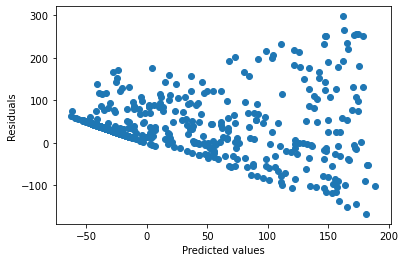

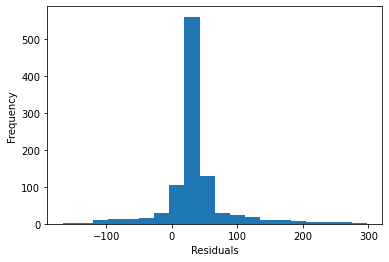

'the residual plot shows a cone shape, it suggests that the model is over-fitting the data \ni.e. the model is too complex and is capturing noise in the data instead of the actual relationship \nbetween the independent and dependent variables).'

In [65]:
#Model 1 : Linear Regression

# Fit the linear regression model
X = X_subset_scaled
y = y_original
model = sm.OLS(y, X).fit()

# Plot the residuals against the independent variables
plt.scatter(model.predict(X), model.resid)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

# Plot the histogram of residuals
plt.hist(model.resid, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

'''the residual plot shows a cone shape, it suggests that the model is over-fitting the data 
i.e. the model is too complex and is capturing noise in the data instead of the actual relationship 
between the independent and dependent variables).'''


In [66]:

X = X_subset_scaled # your feature matrix
y = y_original # your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [67]:
y_original_df = pd.DataFrame(y_original)
y_original_df['days_past_due_class'] = np.where(y_original_df['days_past_due'] == 0, 0, 1)
y_original_df

,days_past_due,days_past_due_class
0,429.0,1
1,160.0,1
2,130.0,1
3,178.0,1
4,280.0,1
...,...,...
995,0.0,0
996,0.0,0
997,0.0,0
998,0.0,0


In [68]:
#Model 2 : Logistic Regression model 

X = X_subset_scaled # your feature matrix
y = y_original_df['days_past_due_class'] # your target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.965
Precision: 1.0
Recall: 0.8679245283018868
F1 Score: 0.9292929292929293


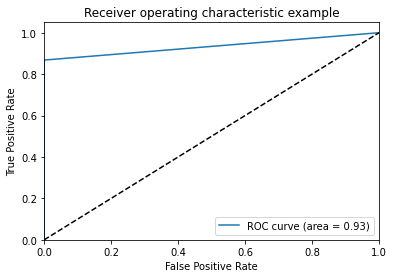

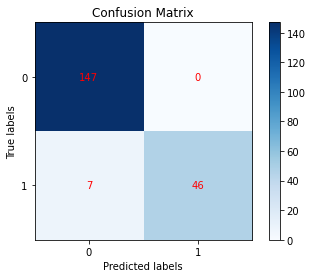

In [69]:
# calculate the roc-auc score
roc_auc = roc_auc_score(y_test, y_pred)

# calculate the false positive rate and true positive rate for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()



In [70]:
tn, fp, fn, tp = cm.ravel()


In [71]:
print("TN :", tn)
print("FP :", fp)
print("FN :", fn)
print("TP :", tp)

TN : 147
FP : 0
FN : 7
TP : 46


In [72]:
def false_negative_rate(cm):
  tn, fp, fn, tp = cm.ravel()
  fn_rate = fn / (fn + tp)
  return fn_rate

def false_negative_records(y_test, y_pred, fn_indices):
  return y_test[fn_indices], y_pred[fn_indices]

cm = np.array([[tn, fp], [fn, tp]])
fn_rate = false_negative_rate(cm)
fn_indices = np.where(y_pred == 0) and (y_test == 1)
fn_records = false_negative_records(y_test, y_pred, fn_indices)


In [73]:
mislabelled_records_indices=list(fn_records[0].index)
mislabelled_records_df= X_subset.loc[mislabelled_records_indices,:]
mislabelled_records_df

,application_id,requested_amount,annual_income_user_input,monthly_scheduled_payment,months_since_first_arrears,months_since_latest_2_down,months_since_latest_arrears,mortgage_monthly_repayments,non_mortgage_monthly_repayments,num_active_cards,...,total_active_balance,unresolved_default_balance,unsecured_monthly_payments,worst_historical_status,Age,loan_purpose_category,highest_debit_category_ordinal,highest_credit_category_ordinal,hard_search_history_count,income_without_rent
136,62180,7000.000,48000.0,257.0,61.0,5.0,5.0,0.0,257.0,5.0,...,7026.0,0.0,512.333333,8.0,31,1,24,2,14,47640.0
76,36615,7500.000,30000.0,373.0,0.0,0.0,0.0,0.0,338.0,1.0,...,13463.0,0.0,179.000000,0.0,43,1,4,0,12,29540.0
899,123264,2000.000,36000.0,105.0,0.0,0.0,0.0,0.0,105.0,2.0,...,3265.0,0.0,130.000000,0.0,39,3,5,1,5,35600.0
174,77211,2000.000,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143.0,0.0,0.000000,0.0,25,2,12,2,3,29350.0
210,87054,2000.000,31221.0,750.0,129.0,36.0,36.0,0.0,750.0,4.0,...,27935.0,0.0,1060.500000,8.0,31,1,0,1,9,30671.0
235,98663,4000.000,22000.0,237.0,112.0,28.0,11.0,0.0,237.0,2.0,...,4273.0,32.0,405.833333,8.0,28,2,12,1,6,21550.0
101,45923,4000.000,44200.0,310.0,14.0,0.0,14.0,0.0,310.0,2.0,...,12861.0,0.0,676.166667,1.0,25,3,4,1,7,44200.0
139,64099,2000.000,26000.0,272.0,69.0,20.0,20.0,0.0,209.0,3.0,...,4167.0,0.0,328.166667,8.0,30,1,4,1,4,26000.0
198,83909,5000.000,33500.0,287.0,69.0,22.0,6.0,0.0,213.0,3.0,...,9242.0,0.0,835.666667,8.0,39,1,4,1,9,32300.0
59,29820,1000.000,43000.0,295.0,21.0,0.0,8.0,0.0,295.0,2.0,...,6693.0,0.0,350.833333,1.0,39,7,5,1,4,42350.0


In [74]:
y_original_df.loc[mislabelled_records_indices,:]

,days_past_due,days_past_due_class
136,40.0,1
76,261.0,1
899,78.0,1
174,36.0,1
210,26.0,1
235,43.0,1
101,156.0,1
139,76.0,1
198,89.0,1
59,37.0,1


In [75]:
combined_df = pd.concat([y_original_df.loc[mislabelled_records_indices,:], X_subset.loc[mislabelled_records_indices,:]], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 136 to 78
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   days_past_due                    53 non-null     float64
 1   days_past_due_class              53 non-null     int64  
 2   application_id                   53 non-null     int64  
 3   requested_amount                 53 non-null     float64
 4   annual_income_user_input         53 non-null     float64
 5   monthly_scheduled_payment        53 non-null     float64
 6   months_since_first_arrears       53 non-null     float64
 7   months_since_latest_2_down       53 non-null     float64
 8   months_since_latest_arrears      53 non-null     float64
 9   mortgage_monthly_repayments      53 non-null     float64
 10  non_mortgage_monthly_repayments  53 non-null     float64
 11  num_active_cards                 53 non-null     float64
 12  num_active_loans      

In [80]:
#Checking sample cases

###### Case 1 : hard_search_history_count >6  and days past due > 90  or primary_category_description_ordinal == 7 and days past due is > 90 decline 



combined_df['decision'] = np.where((combined_df['hard_search_history_count'] > 6) & (combined_df['days_past_due'] > 90) | (combined_df['highest_debit_category_ordinal'] == 3) & (combined_df['days_past_due'] > 90) | (combined_df['highest_credit_category_ordinal'] == 6) & (combined_df['days_past_due'] > 90), 'High Risk', 'TBD')




###### Case 2 :  num_settled_cais > 6, annual_income >30000,  days past due < 30 and not a high risk application then accept


combined_df['decision'] = np.where((combined_df['annual_income_user_input']>6)&(combined_df['annual_income_user_input']>30000) & (combined_df['days_past_due']<30) & (combined_df['decision']!="High Risk"),"Low Risk","TBD")



tbd_applications = combined_df[combined_df["decision"]=="TBD"]

tbd_applications


,days_past_due,days_past_due_class,application_id,requested_amount,annual_income_user_input,monthly_scheduled_payment,months_since_first_arrears,months_since_latest_2_down,months_since_latest_arrears,mortgage_monthly_repayments,...,unresolved_default_balance,unsecured_monthly_payments,worst_historical_status,Age,loan_purpose_category,highest_debit_category_ordinal,highest_credit_category_ordinal,hard_search_history_count,income_without_rent,decision
136,40.0,1,62180,7000.000,48000.0,257.0,61.0,5.0,5.0,0.0,...,0.0,512.333333,8.0,31,1,24,2,14,47640.0,TBD
76,261.0,1,36615,7500.000,30000.0,373.0,0.0,0.0,0.0,0.0,...,0.0,179.000000,0.0,43,1,4,0,12,29540.0,TBD
899,78.0,1,123264,2000.000,36000.0,105.0,0.0,0.0,0.0,0.0,...,0.0,130.000000,0.0,39,3,5,1,5,35600.0,TBD
174,36.0,1,77211,2000.000,30000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,25,2,12,2,3,29350.0,TBD
235,43.0,1,98663,4000.000,22000.0,237.0,112.0,28.0,11.0,0.0,...,32.0,405.833333,8.0,28,2,12,1,6,21550.0,TBD
101,156.0,1,45923,4000.000,44200.0,310.0,14.0,0.0,14.0,0.0,...,0.0,676.166667,1.0,25,3,4,1,7,44200.0,TBD
139,76.0,1,64099,2000.000,26000.0,272.0,69.0,20.0,20.0,0.0,...,0.0,328.166667,8.0,30,1,4,1,4,26000.0,TBD
198,89.0,1,83909,5000.000,33500.0,287.0,69.0,22.0,6.0,0.0,...,0.0,835.666667,8.0,39,1,4,1,9,32300.0,TBD
59,37.0,1,29820,1000.000,43000.0,295.0,21.0,0.0,8.0,0.0,...,0.0,350.833333,1.0,39,7,5,1,4,42350.0,TBD
96,304.0,1,45303,2000.000,33000.0,308.0,48.0,0.0,48.0,0.0,...,0.0,1601.033333,1.0,44,1,5,2,4,32725.0,TBD


In [81]:
combined_df['hard_search_history_count'].describe()

count    53.000000
mean      5.641509
std       2.394660
min       2.000000
25%       4.000000
50%       5.000000
75%       7.000000
max      14.000000
Name: hard_search_history_count, dtype: float64

#### Scoring Model

In [84]:
#Scoring model 
def calculate_score(row):
    score = 0
    
    #1 num_active_cards
    if row['num_active_cards'] < 5:
        score += 3
    else:
        score += 5
    
    #2 num_active_loans
    if row['num_active_loans'] < 5:
        score += 5
    else:
        score += 3
    
    #3 monthly_scheduled_payment
    if row['monthly_scheduled_payment'] < 350:
        score += 5
    else:
        score += 2
    
    #4 total_active_balance
    if row['total_active_balance'] < 30000:
        score += 5
    else:
        score += 3
    
    #5 hard_search_history_count
    if row['hard_search_history_count'] < 3:
        score += 10
    elif 3 <= row['hard_search_history_count'] <= 5:
        score += 5
    else:
        score += 2
    
    #6 annual_income_user_input
    if row['annual_income_user_input']<30000 :
        score += 3
    elif 30000 <= row['annual_income_user_input'] <= 50000:
        score += 5
    else:
        score += 10
    
    
    
    #7 requested_amount
    if row['requested_amount'] < 5000:
        score += 5
    else:
        score += 3
    
    #8 months_since_latest_2_down
    if 0 <= row['months_since_latest_2_down'] <= 5:
        score += 1
    elif 10 <= row['months_since_latest_2_down'] <= 15:
        score += 2
    elif 15 <= row['months_since_latest_2_down'] <= 20:
        score += 3
    elif 20 <= row['months_since_latest_2_down'] <= 25:
        score += 4
    elif 25 <= row['months_since_latest_2_down'] <= 30:
        score += 5
    else:
        score += 10
    
    #9 months_since_first_arrears
    if 0 <= row['months_since_first_arrears'] <= 5:
        score += 1
    elif 10 <= row['months_since_first_arrears'] <= 15:
        score += 2
    elif 15 <= row['months_since_first_arrears'] <= 20:
        score += 3
    elif 20 <= row['months_since_first_arrears'] <= 25:
        score += 4
    elif 25 <= row['months_since_first_arrears'] <= 30:
        score += 5
    else:
        score += 10
    
    #10 non_mortgage_monthly_repayments
    if row['non_mortgage_monthly_repayments'] >= 250:
        score += 5
    elif row['non_mortgage_monthly_repayments'] < 250:
        score += 2
    
    #11 unsecured_monthly_payments
    if row['unsecured_monthly_payments'] <=500:
        score +=5
    elif row['unsecured_monthly_payments'] >500:
        score+=2
    
    #12 loan_purpose_category
    if row['loan_purpose_category'] <= 3 :
        score+=5
    elif row['loan_purpose_category'] >3 :
        score +=2
    
    #13 highest_debit_category_ordinal
    if row['highest_debit_category_ordinal'] <= 7 :
        score +=3
    elif row['highest_debit_category_ordinal'] > 7 :
        score +=5
    
    #14 income_without_rent
    if row['income_without_rent'] <= 30000 :
        score +=3
    elif 30000 < row['income_without_rent'] <= 50000 :
        score +=5
    elif row['income_without_rent'] > 50000 :
        score += 10
        
    #15 num_settled_cais 
    if row['num_settled_cais'] <= 6 :
        score +=3
    elif row['num_settled_cais'] > 6 :
        score +=5
    return score

In [85]:
combined_df["my_score"] = combined_df.apply(calculate_score, axis=1)


In [86]:
#Can use this to update the decision to low risk as these applications are closer to 100

combined_df[combined_df['my_score'] > 70]


,days_past_due,days_past_due_class,application_id,requested_amount,annual_income_user_input,monthly_scheduled_payment,months_since_first_arrears,months_since_latest_2_down,months_since_latest_arrears,mortgage_monthly_repayments,...,unsecured_monthly_payments,worst_historical_status,Age,loan_purpose_category,highest_debit_category_ordinal,highest_credit_category_ordinal,hard_search_history_count,income_without_rent,decision,my_score
210,26.0,1,87054,2000.0,31221.0,750.0,129.0,36.0,36.0,0.0,...,1060.500000,8.0,31,1,0,1,9,30671.0,Low Risk,72
23,23.0,1,21142,1000.0,22000.0,371.0,47.0,6.0,6.0,0.0,...,307.000000,8.0,30,1,4,1,4,22000.0,TBD,74
30,340.0,1,23531,3000.0,2600.0,386.0,39.0,38.0,38.0,0.0,...,443.000000,2.0,25,1,4,2,5,2600.0,TBD,72
221,98.0,1,92746,1000.0,55000.0,1599.0,66.0,0.0,66.0,786.0,...,1108.833333,1.0,40,3,2,1,5,54500.0,TBD,72
260,36.0,1,106323,10000.0,40000.0,0.0,82.0,34.0,34.0,0.0,...,0.000000,4.0,29,1,3,2,8,39400.0,TBD,73
244,74.0,1,100635,2500.0,25000.0,189.0,72.0,71.0,71.0,0.0,...,345.833333,2.0,27,1,5,1,4,24500.0,TBD,74
158,14.0,1,72427,5000.0,70000.0,71.0,118.0,17.0,17.0,0.0,...,365.250000,6.0,34,3,0,1,10,68804.0,Low Risk,76
60,130.0,1,30973,7500.0,150000.0,4344.0,73.0,0.0,0.0,3408.0,...,564.833333,8.0,33,2,15,2,10,149200.0,TBD,71


In [87]:
#Can use this to update the decision to high risk 

combined_df[combined_df['my_score'] <= 70]

,days_past_due,days_past_due_class,application_id,requested_amount,annual_income_user_input,monthly_scheduled_payment,months_since_first_arrears,months_since_latest_2_down,months_since_latest_arrears,mortgage_monthly_repayments,...,unsecured_monthly_payments,worst_historical_status,Age,loan_purpose_category,highest_debit_category_ordinal,highest_credit_category_ordinal,hard_search_history_count,income_without_rent,decision,my_score
136,40.0,1,62180,7000.000,48000.0,257.0,61.0,5.0,5.0,0.0,...,512.333333,8.0,31,1,24,2,14,47640.0,TBD,68
76,261.0,1,36615,7500.000,30000.0,373.0,0.0,0.0,0.0,0.0,...,179.000000,0.0,43,1,4,0,12,29540.0,TBD,51
899,78.0,1,123264,2000.000,36000.0,105.0,0.0,0.0,0.0,0.0,...,130.000000,0.0,39,3,5,1,5,35600.0,TBD,58
174,36.0,1,77211,2000.000,30000.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,25,2,12,2,3,29350.0,TBD,58
235,43.0,1,98663,4000.000,22000.0,237.0,112.0,28.0,11.0,0.0,...,405.833333,8.0,28,2,12,1,6,21550.0,TBD,68
101,156.0,1,45923,4000.000,44200.0,310.0,14.0,0.0,14.0,0.0,...,676.166667,1.0,25,3,4,1,7,44200.0,TBD,56
139,76.0,1,64099,2000.000,26000.0,272.0,69.0,20.0,20.0,0.0,...,328.166667,8.0,30,1,4,1,4,26000.0,TBD,65
198,89.0,1,83909,5000.000,33500.0,287.0,69.0,22.0,6.0,0.0,...,835.666667,8.0,39,1,4,1,9,32300.0,TBD,64
59,37.0,1,29820,1000.000,43000.0,295.0,21.0,0.0,8.0,0.0,...,350.833333,1.0,39,7,5,1,4,42350.0,TBD,61
96,304.0,1,45303,2000.000,33000.0,308.0,48.0,0.0,48.0,0.0,...,1601.033333,1.0,44,1,5,2,4,32725.0,TBD,69


### Results not included in the analysis as they did not improve performance

In [ ]:
#Hyperparameter tuning 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor


# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 200, 300],
              'max_depth': [2, 4, 6, 8, 10]}

# Create the model
rf_model = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a RandomForestRegressor with the best hyperparameters
rf_model = RandomForestRegressor(**best_params)

# Implement Bagging by creating a BaggingRegressor with the RandomForestRegressor
bagging_regressor = BaggingRegressor(rf_model)
bagging_regressor.fit(X_train, y_train)


In [ ]:
# Predict on the test data
y_pred_bagging = bagging_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_bagging)
mae = mean_absolute_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)
evs = explained_variance_score(y_test, y_pred_bagging)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Explained Variance Score: ", evs)

In [ ]:
#Hyperparameter tuning 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 200, 300],
              'max_depth': [2, 4, 6, 8, 10]}

# Create the model
rf_model = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a RandomForestRegressor with the best hyperparameters
rf_model = RandomForestRegressor(**best_params)

# Implement Bagging by creating a BaggingRegressor with the RandomForestRegressor
boosting_regressor = AdaBoostRegressor(rf_model)
boosting_regressor.fit(X_train, y_train)


In [ ]:
# Predict on the test data
y_pred_boosting = boosting_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_boosting)
mae = mean_absolute_error(y_test, y_pred_boosting)
r2 = r2_score(y_test, y_pred_boosting)
evs = explained_variance_score(y_test, y_pred_boosting)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Explained Variance Score: ", evs)

In [ ]:
regressor.get_params()

In [ ]:
#Base Model : Linear Regression 
from sklearn.linear_model import LinearRegression

# create an instance of the linear regression model
model = LinearRegression()


# fit the model to the training data
model.fit(X_train, y_train)

# predict the target variable using the test data
y_pred = model.predict(X_test)

# get the coefficients of the features
coeff = model.coef_
col_names = X_subset.columns

for i in range(len(col_names)):
    print("Column: ", col_names[i], "Coefficient: ", coeff[i]) 

In [ ]:

 X_subset.columns


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R^2
print("Mean squared error:", mse)
print("R^2:", r2)

In [ ]:
#Model 2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Create a Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Explained Variance Score: ", evs)


In [ ]:
# Get feature importances
importances = regressor.feature_importances_

# Print feature importances
print(importances)

'''The feature importances are the average decrease in impurity (measured by Gini impurity) across all trees in the forest. Higher values indicate that the feature is more important in predicting the target variable.'''

In [ ]:
col_names = X_subset.columns

for i in range(len(col_names)):
    print("Column: ", col_names[i], "Coefficient: ", importances[i])

In [ ]:
y

#### Checking if this could work as a scoring model

In [ ]:
coef=logistic_regression.coef_

In [ ]:
col_names = X_subset.columns



for i in range(len(col_names)):
    print("Column: ", col_names[i], "Coefficient: ", coef[0, i])
 

In [ ]:
coef

In [ ]:
#Sum not equal to 1

list1=[-5.93413735,  0.11579291,  0.03352418,  0.0456403 ,  0.36375015,
        -0.21018674, -0.08310825, -0.00952466, -0.13351503, -0.21558667,
        -0.07858768, -0.21846   , -0.2585611 , -0.06905749,  0.44862562,
        -0.06462815,  0.21778048,  0.09951451,  0.08937144,  0.12597428]
sum(list1)